In [24]:
import pandas as pd

In [25]:
food_orders = pd.read_csv('/content/food_orders_new_delhi.csv')

In [26]:
food_orders

Order ID Customer ID Restaurant ID  Order Date and Time  \
0           1       C8270         R2924  2024-02-01 01:11:52   
1           2       C1860         R2054  2024-02-02 22:11:04   
2           3       C6390         R2870  2024-01-31 05:54:35   
3           4       C6191         R2642  2024-01-16 22:52:49   
4           5       C6734         R2799  2024-01-29 01:19:30   
..        ...         ...           ...                  ...   
995       996       C6232         R2129  2024-01-14 05:57:00   
996       997       C6797         R2742  2024-01-28 08:50:43   
997       998       C5926         R2837  2024-01-21 09:43:19   
998       999       C7016         R2144  2024-01-30 22:23:38   
999      1000       C4335         R2890  2024-01-08 14:46:43   

    Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0      2024-02-01 02:39:52         1914             0       Credit Card   
1      2024-02-02 22:46:04          986            40    Digital Wallet   
2      2024-01-31 06:52:35          937            30  Cash on Delivery   
3      2024-01-16 23:38:49         1463            50  Cash on Delivery   
4      2024-01-29 02:48:30         1992            30  Cash on Delivery   
..                     ...          ...           ...               ...   
995    2024-01-14 06:39:00          825             0    Digital Wallet   
996    2024-01-28 10:10:43         1627            50  Cash on Delivery   
997    2024-01-21 10:44:19          553            20  Cash on Delivery   
998    2024-01-31 00:07:38         1414             0  Cash on Delivery   
999    2024-01-08 15:39:43         1657            20    Digital Wallet   

    Discounts and Offers  Commission Fee  Payment Processing Fee  \
0              5% on App             150                      47   
1                    10%             198                      23   
2           15% New User             195                      45   
3                    NaN             146                      27   
4           50 off Promo             130                      50   
..                   ...             ...                     ...   
995            5% on App             165                      47   
996                  NaN             110                      42   
997                  NaN              64                      31   
998         15% New User             199                      34   
999         15% New User             180                      27   

     Refunds/Chargebacks  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
995                   50  
996                    0  
997                    0  
998                    0  
999                  100  

[1000 rows x 12 columns]

In [27]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [28]:
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

The dataset contains 1,000 entries and 12 columns, with 185  missing values in Discounts and Offers  of the columns. Now, we need to perform some data cleaning and preparation.
we use the fill the null values by using mode method because its string values and fill with mode value Below are the necessary cleaning steps we need to take:

Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
Ensure all monetary values are in a suitable format for calculations.

In [29]:
mode_value = food_orders['Discounts and Offers'].mode()[0]

In [30]:
mode_value

'10%'

In [31]:
food_orders['Discounts and Offers'].fillna(mode_value,inplace=True)

In [32]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [33]:
food_orders.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [34]:
data = food_orders[['Discounts and Offers','Order Value']]
new = pd.DataFrame(data)

In [35]:
new

Discounts and Offers  Order Value
0              5% on App         1914
1                    10%          986
2           15% New User          937
3                    10%         1463
4           50 off Promo         1992
..                   ...          ...
995            5% on App          825
996                  10%         1627
997                  10%          553
998         15% New User         1414
999         15% New User         1657

[1000 rows x 2 columns]

In [36]:
# convert date and time columns to date time
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# lets create function to extract numerical value from the discounts and offers strigs
def extract_discount(discount_str):
  if 'off' in discount_str:
    return float(discount_str.split(' ')[0])
  elif '%' in discount_str:
    return float(discount_str.split('%')[0])
  else:
    return 0.0

# apply the function to create a new 'Discount Value' column

food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))


# for percentage discounts, calucalate the discount amout based on the order value


food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x:
                                                   x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100,
                                                   axis=1)

print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']]
      .head(), food_orders.dtypes)


   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  10%                 10.0           146.30
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

1. Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
2. A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
3. Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

# cost and profitability analysis

for cost analysis we'll consider the following cost associated with each other

1. **Delivery fee** : fee charged for the delivery

2. **Payment Proccessing** : fee charged processing payment

3. **Discount amount** : the discount provided on the orders


We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.


In [37]:
# lets cliculate with the cost and profitablity analysis

food_orders['Total costs'] = food_orders['Delivery Fee'] +food_orders['Payment Processing Fee'] + food_orders['Discount Amount']

food_orders['Revenue'] = food_orders['Commission Fee']

food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total costs']


# aggregate data to get overall matrics

total_orders = food_orders.shape[0]
total_Revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_matrics = {
    "Total orders" : total_orders,
    "Total Revenue" : total_Revenue,
    "Total costs" : total_costs,
    "Total Profit" : total_profit
}

In [38]:
overall_matrics

{'Total orders': 1000,
 'Total Revenue': 126990,
 'Total costs': 252095.55,
 'Total Profit': -125105.55}

Based on the analysis, here are the overall metrics for the food delivery operations:

1. Total Orders: 1,000
2. Total Revenue (from Commission Fees): 126,990 INR
3. Total Costs: 232,709.85 INR (including delivery fees,
  payment processing fees, and discounts)
4. Total Profit: -105,719.85 INR**


The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.


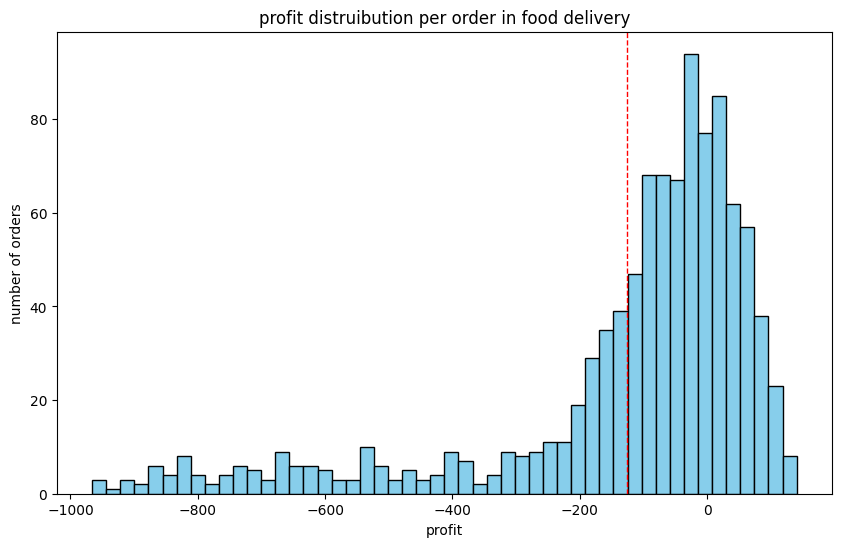

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(food_orders['Profit'],bins=50,color='skyblue',edgecolor='black')
plt.title('profit distruibution per order in food delivery')
plt.xlabel('profit')
plt.ylabel('number of orders')
plt.axvline(food_orders['Profit'].mean(),color='red',linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss **(profits below 0).** The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

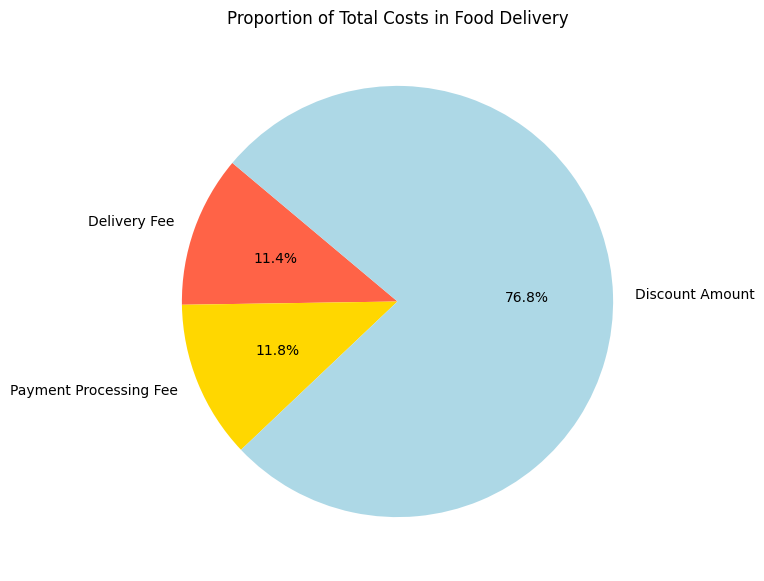

In [40]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

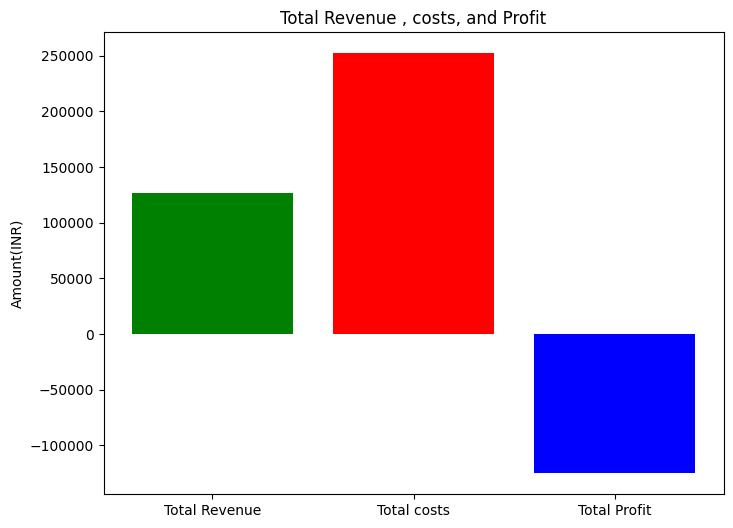

In [43]:
# the bar chart for total revenue, costs, and profit

totals=['Total Revenue', 'Total costs','Total Profit']
values = [total_Revenue, total_costs ,total_profit]

plt.figure(figsize=(8,6))
plt.bar(totals,values,color=['green','red','blue'])
plt.title('Total Revenue , costs, and Profit')
plt.ylabel('Amount(INR)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

# A STRAGERY FOR PROFITS
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

1. A new average commission percentage based on profitable orders.
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.
Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

* The average commission percentage for profitable orders.
* The average discount percentage for profitable orders.

In [54]:
profitable_orders = food_orders[food_orders['Profit']>0]
#avg for commission percentage
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value'])*100
#avg for dicount percenatge
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Percentage'] / profitable_orders['Order Value']) * 100

# caluculate the new avg

new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage,new_avg_discount_percentage)



37.99993176163184 3.2211487351051855


<ipython-input-54-ae777869da11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value'])*100
<ipython-input-54-ae777869da11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Percentage'] / profitable_orders['Order Value']) * 100


In [55]:
print(new_avg_commission_percentage,new_avg_discount_percentage)

37.99993176163184 3.2211487351051855


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

* New Average Commission Percentage:37.99%
* New Average Discount Percentage: 3.33%

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.


Based on this analysis, a strategy that aims for a commission rate closer to 38% and a discount rate around 4% could potentially improve profitability across the board.

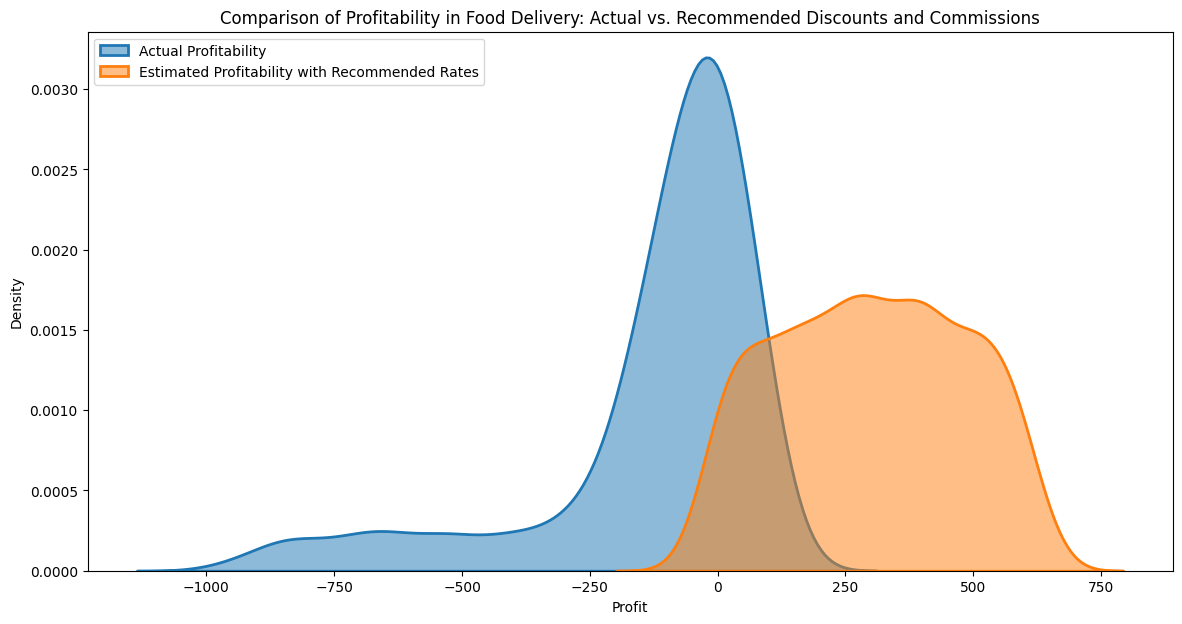

In [60]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 38.0  # 30%
recommended_discount_percentage = 4.0   # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.